## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [2]:
df=pd.read_csv('distance_dataset (1).csv')

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [8]:
matYZ=df[['Y','Z']].to_numpy()
matXYZ=df[['X','Y','Z']].to_numpy()

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [9]:
simCosine3D = 1. - cosine_similarity(matXYZ, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

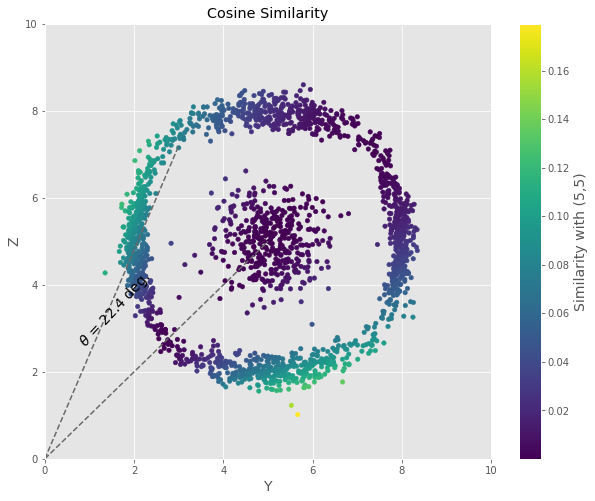

In [10]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

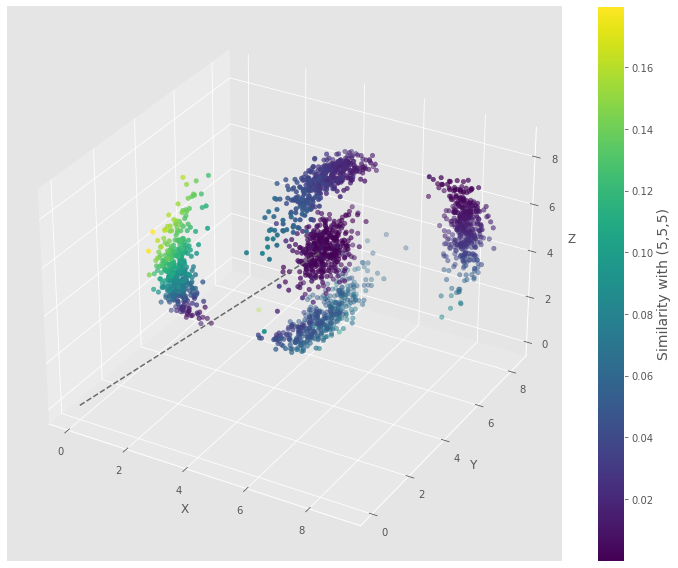

In [13]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(matXYZ[:,0], matXYZ[:,1], matXYZ[:,2], c=simCosine3D[:,0])
ax.plot([0,5],[0,5],[0,5], '--', color='dimgray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [16]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

In [29]:
document1="""Philip Alfred Mickelson (born June 16, 1970), nicknamed Lefty, 
is an American professional golfer. He has won 45 events on the PGA Tour, including
six major championships: three Masters titles (2004, 2006, 2010), two PGA Championships 
(2005, 2021),[3] and one Open Championship (2013).[4] With his win at the 2021 PGA Championship,
Mickelson became the oldest major championship winner in history at the age of 50.[5]Mickelson
is one of 12 players in the history of golf to win three of the four majors.[6]
He has won every major except the U.S. Open, in which he has finished runner-up a record six times.[7]
Mickelson has spent more than 25 consecutive years in the top 50 of the Official World Golf Ranking.[8]
He has spent over 700 weeks in the top 10,[9] has reached a career-high world ranking of No. 2 several 
times and is a life member of the PGA Tour. Although naturally right-handed, he is known for his
left-handed swing, having learned it by mirroring his right-handed father's swing.[1] He
was inducted into the World Golf Hall of Fame in 2012.[10]"""

document2="""Eldrick Tont "Tiger" Woods (born December 30, 1975) is an American professional golfer. 
He is tied for first in PGA Tour wins, ranks second in men's major championships, and holds numerous 
golf records.[5] Woods is widely regarded as one of the greatest golfers of all time and one of the most
famous athletes in the world. He was elected to the World Golf Hall of Fame.[6] Following an outstanding
junior, college, and amateur golf career, Woods turned professional in 1996 at the age of 20.
By the end of April 1997, he won three PGA Tour events in addition to his first major, the 1997
Masters, which he won by 12 strokes in a record-breaking performance. He reached number one in the world 
rankings for the first time in June 1997, less than a year after turning pro. Throughout the first decade 
of the 21st century, Woods was the dominant force in golf. He was the top-ranked golfer in the
world from August 1999 to September 2004 (264 consecutive weeks) and again from June 2005 to October 2010 
(281 consecutive weeks). During this time, he won 13 of golf's major championships. The next decade of
Woods' career was marked by comebacks from personal problems and injuries. He took a self-imposed hiatus
from professional golf from December 2009 to early April 2010 in an attempt to resolve marital issues with
his wife at the time, Elin. Woods admitted to multiple infidelities, and the couple eventually divorced.[7]
Woods fell to number 58 in the world rankings in November 2011 before ascending again to the number-one ranking 
between March 2013 and May 2014.[8][9] However, injuries led him to undergo four back surgeries between 2014 and
2017.[10] Woods competed in only one tournament between August 2015 and January 2018, and he dropped off the list
of the world's top 1,000 golfers.[11][12] On his return to regular competition, Woods made steady progress to 
the top of the game, winning his first tournament in five years at the Tour Championship in September 2018 and
his first major in 11 years at the 2019 Masters. Woods has held numerous golf records. He has been the
number one player in the world for the most consecutive weeks and for the greatest total number of weeks of any
golfer in history. He has been awarded PGA Player of the Year a record 11 times[13] and has won the Byron Nelson
Award for lowest adjusted scoring average a record eight times. Woods has the record of leading the money
list in ten different seasons. He has won 15 professional major golf championships (trailing only Jack Nicklaus,
who leads with 18) and 82 PGA Tour events (tied for first all time with Sam Snead).[14] Woods leads all active
golfers in career major wins and career PGA Tour wins. Woods is the fifth (after Gene Sarazen, Ben Hogan,
Gary Player and Jack Nicklaus) player to achieve the career Grand Slam, and the youngest to do so. He is also
the second golfer (after Nicklaus) to achieve a career Grand Slam three times.  Woods has won 18 World Golf Championships
. He was also part of the American winning team for the 1999 Ryder Cup. In May 2019, Woods was awarded the
Presidential Medal of Freedom by Donald Trump, the fourth golfer to receive the honor.[15] On February 23, 2021
, Woods was hospitalized in serious but stable condition after a single-car collision and underwent
emergency surgery to repair compound fractures sustained in each leg in addition to a shattered ankle.[16]"""

document3="""Andrew Stephen "Andy" Roddick is an American retired world No. 1 tennis player. Roddick gained the
world No. 1 ranking shortly after winning the 2003 US Open title, defeating French Open champion Juan Carlos Ferrero
in the final. Despite spending several more years as one of the world's best players, the 2003 US Open title would 
remain his only Grand Slam triumph. As of May 2021, he is the most recent North American male player to win a
Grand Slam singles event, the most recent to hold the top ranking, and the most recent to claim the year-end world
No. 1 ranking (which he achieved in 2003). Roddick reached four other Grand Slam finals (Wimbledon in 2004, 2005,
and 2009, and the US Open in 2006), losing to rival Roger Federer each time. Roddick was ranked in the year-end
top 10 for nine consecutive years (2002–2010) and won five Masters Series titles in that period. He was also a crucial
player in the U.S. Davis Cup team's successful run to the title in 2007. He is married to Brooklyn Decker, a swimwear
model and actress. On August 30, 2012, during the 2012 US Open and on his 30th birthday, Roddick announced that he
would retire after the tournament. Following his final match (a fourth-round defeat to Juan Martín del 
Potro), Roddick retired from the sport to focus on his work at the Andy Roddick Foundation.[2] In 2015, Roddick
played for the Austin Aces in World Team Tennis. This was his eighth season in World Team Tennis and the
fifth team for which he has played. He was also the 2015 champion of the QQQ Champions Series, a feat that he
repeated again in 2017.[3]"""


 **<font color='teal'> Combine the documents into a corpus.</font>**

In [30]:
corpus=[document1,document2,document3]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [33]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [34]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Phil','Tiger','Andy'])

,000,10,11,12,13,14,15,16,18,1970,...,wins,with,won,woods,work,world,would,year,years,youngest
Phil,0,2,0,1,0,0,0,1,0,1,...,0,1,2,0,0,3,0,0,1,0
Tiger,1,1,3,2,2,1,2,1,2,0,...,3,3,6,16,0,8,0,2,2,1
Andy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,6,2,2,2,0


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [35]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)

 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [37]:
pd.DataFrame(cosine_similarity(trsfm),index=['Phil','Tiger','Andy'],columns=['Phil','Tiger','Andy'])

,Phil,Tiger,Andy
Phil,1.000000,0.591803,0.470110
Tiger,0.591803,1.000000,0.581024
Andy,0.470110,0.581024,1.000000


Above I calculated the cosine similarity on a tf-idf array evaluating the words in the wikipedia summaries for golfers Phil Mickleson, Tiger Woods and tennis player Andy Roddick.  The cosine similarity metric shows that the summaries for Phil Mickleson and Tiger woods are similar.  It also shows that entries for Mickleson and Woods are pretty similar with Roddick, but a little less so.  This would not be great to use as a recommender system as the difference in cosine similarities between the the 2 golfers is only marginally higher than than between the golfers and the tennis player.  